In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import copy
import os
from os import path

In [4]:
# Нормированная матрица сочетаний
def getNormGLCM(normArr):
    a1 = copy.deepcopy(normArr)
    a2 = []
    for i in range(1, len(a1)):
        a2.append(a1[i])
    del a1[-1]
    strA = []
    for i in range(len(a1)):
        strA.append(str(a1[i]) + str(a2[i]))
    a3 = []
    for i in range(len(strA)):
        a3.append(strA.count(strA[i]))
    df = pd.DataFrame({'x': a1, 'y': a2, 'z': a3})
    df = df.drop_duplicates()
    return df.sort_values(by=['x'])

def getNormArr(a):
    normArr = []
    for i in range(len(a) - 1):
        z = int(a[i + 1]) - int(a[i])
        normArr.append(z)
    return normArr
def getGLRLM(a):
    idList = []
    for i in range(min(a), max(a)+1):
        idList.append(i)
    minArr = abs(min(a))
    for i in range(len(a)):
        a[i] += minArr
    maxArr = max(a) + 1
    zArr = np.zeros((maxArr, 3))
    zArr = zArr.astype(int)
    for i in range(3):
        d = i % 3
        for j in range(len(a)):
            if (j != (len(a) - d)):
                if i == 0:
                    zArr[a[j]][i] += 1
                elif i == 1:
                    if (a[j] == a[j + 1]):
                        zArr[a[j]][i] += 1
                else:
                    if (a[j] == a[j + 1] == a[j + 2]):
                        zArr[a[j]][i] += 1
            else:
                break
    l = maxArr
    i = 0
    while i < l:
        if zArr[i][0] == 0 and zArr[i][1] == 0 and zArr[i][2] == 0:
            zArr = np.delete(zArr, (i), axis=0)
            del idList[i]
            l -= 1
        else: 
            i += 1
    df = pd.DataFrame(zArr, columns=['len1', 'len2', 'len3'])
    df['grad'] = idList
    return df

In [6]:
data_dir = "C:\\Users\\User\\Documents\\notebooks\\dataset_for_mgua\\"
diseases_folders = os.listdir(data_dir)
class_counter = 1
for dis in diseases_folders:
    load_folder =  path.join(data_dir, dis)
    image_files = os.listdir(load_folder)
    df_orig = pd.DataFrame(columns = ["grad", "len1", "len2", "len3", "object"])
    object_counter = 1
    for img_name in image_files:
        img = cv2.imread(path.join(load_folder, img_name), cv2.IMREAD_GRAYSCALE)
        img = img.flatten()
        img = getNormArr(img)
        img_df = getGLRLM(img)
        img_df["object"] = object_counter
        df_orig = df_orig.append(img_df)
        object_counter += 1
    df_orig["class"] = class_counter
    class_counter += 1
    df_orig.to_excel(dis + "_lengths.xlsx", columns=["class", "object", "grad", "len1", "len2", "len3"], index=False)

In [6]:
load_folder =  "C:\\Users\\User\\Documents\\notebooks\\dataset_for_mgua\\Vilson"
image_files = os.listdir(load_folder)
df_orig = pd.DataFrame(columns = ["x", "y", "z", "object"])
object_counter = 1
for img_name in image_files:
    img = cv2.imread(path.join(load_folder, img_name), cv2.IMREAD_GRAYSCALE)
    img = img.flatten()
    img = getNormArr(img)
    img_df = getNormGLCM(img)
    img_df["object"] = object_counter
    df_orig = df_orig.append(img_df)
    object_counter += 1
df_orig["class"] = 4
df_orig.to_excel("Vilson_pairs.xlsx", columns=["class", "object", "x", "y", "z"], index=False)

In [32]:
df_orig["class"] = 1
df_orig.to_excel("AIG_pairs2.xlsx", columns=["class", "object", "x", "y", "z"], index=False)


In [30]:
img_path =  "C:\\Users\\User\\Documents\\notebooks\\dataset_for_mgua\\AIG"
img_name = path.join(img_path, "30.png")
img = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
img = img.flatten()
img = getNormArr(img)
hst = count_elements(img)
df = getGLRLM(img)


In [34]:
df[0:50]

,len1,len2,len3,grad
0,1,0,0,-44
1,2,0,0,-39
2,2,0,0,-35
3,3,0,0,-34
4,3,0,0,-33
5,4,0,0,-32
6,2,0,0,-31
7,4,0,0,-30
8,7,0,0,-29
9,10,0,0,-28


In [39]:
pd.set_option("display.max_rows", 101)
print(df)

    len1  len2  len3  grad
0      1     0     0   -44
1      2     0     0   -39
2      2     0     0   -35
3      3     0     0   -34
4      3     0     0   -33
5      4     0     0   -32
6      2     0     0   -31
7      4     0     0   -30
8      7     0     0   -29
9     10     0     0   -28
10     9     0     0   -27
11    14     0     0   -26
12    13     0     0   -25
13    20     0     0   -24
14    18     0     0   -23
15    24     0     0   -22
16    24     0     0   -21
17    47     1     0   -20
18    49     0     0   -19
19    39     0     0   -18
20    75     1     0   -17
21    83     0     0   -16
22    78     1     0   -15
23    88     0     0   -14
24   126     3     0   -13
25   132     1     0   -12
26   162     1     0   -11
27   158     2     0   -10
28   193     4     0    -9
29   208     7     0    -8
30   221    10     0    -7
31   265     4     0    -6
32   282    11     0    -5
33   263     7     0    -4
34   301     8     0    -3
35   289    16     3    -2
3

In [60]:
df_app

,class,classs,object,x,y,z
12,NaN,1.0,1,-16,-14,1
7031,NaN,1.0,1,-15,-10,1
13,NaN,1.0,1,-14,-1,1
7561,NaN,1.0,1,-13,-12,1
7753,NaN,1.0,1,-12,-4,1
...,...,...,...,...,...,...
8882,NaN,1.0,1,46,-6,1
3212,NaN,1.0,1,47,-3,1
10394,NaN,1.0,1,50,3,1
3023,NaN,1.0,1,50,-5,1


(0.0, 1890.0)

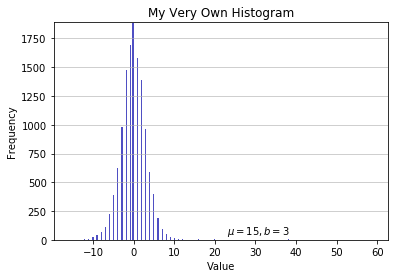

In [4]:
n, bins, patches = plt.hist(x=img, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [25]:
amount = 0
for i in hst:
    if (hst[i] < 100):
        #print("key: ", i, "   value: ", hst[i], sep='')
        amount += 1
print ("amount of less then 100: ", amount)
amount = 0
for i in hst:
    if (hst[i] > 100):
        #print("key: ", i, "   value: ", hst[i], sep='')
        amount += 1
print ("amount of greater then 100: ", amount)

amount of less then 100:  42
amount of greater then 100:  14


SyntaxError: can't assign to function call (<ipython-input-29-ed8eac5dc7c4>, line 1)

In [49]:
df2 = df.assign(object = 1, classs = 1)

In [50]:
df3 = df2[["classs", "object", "x", "y", "z"]]

In [51]:
df3


,classs,object,x,y,z
12,1,1,-16,-14,1
7031,1,1,-15,-10,1
13,1,1,-14,-1,1
7561,1,1,-13,-12,1
7753,1,1,-12,-4,1
...,...,...,...,...,...
8882,1,1,46,-6,1
3212,1,1,47,-3,1
10394,1,1,50,3,1
3023,1,1,50,-5,1
